# Average True Range Percent (ATRP)

https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/atrp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2017-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,26.952709,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,26.922541,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.059450,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.361120,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.611734,134247600


In [3]:
n = 14
df['HL'] = df['High'] - df['Low']
df['HC'] = abs(df['High'] - df['Adj Close'].shift())
df['LC'] = abs(df['Low'] - df['Adj Close'].shift())
df['TR'] = df[['HL','HC','LC']].max(axis=1)
df['ATR'] = df['TR'].rolling(n).mean()
df['ATRP'] = (df['ATR'] / df['Adj Close'] ) * 100
df = df.drop(['HL','HC','LC','TR'],axis=1)

In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,ATR,ATRP
Date,,,,,,,,
2018-12-24,37.037498,37.887501,36.647499,36.707500,35.139687,148676800,2.084241,5.931301
2018-12-26,37.075001,39.307499,36.680000,39.292500,37.614300,234330000,2.272656,6.041999
2018-12-27,38.959999,39.192501,37.517502,39.037498,37.370178,212468400,2.291646,6.132285
2018-12-28,39.375000,39.630001,38.637501,39.057499,37.389324,169165600,2.323911,6.215440
2018-12-31,39.632500,39.840000,39.119999,39.435001,37.750698,140014000,2.341882,6.203547


Text(0.5, 0, 'Date')

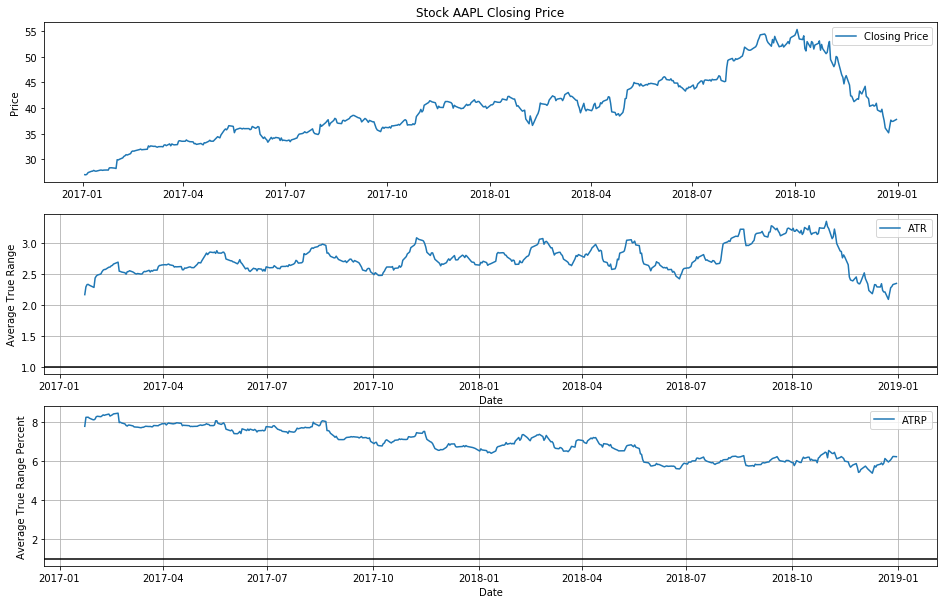

In [5]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(3, 1, 1)
ax1.plot(df['Adj Close'], label='Closing Price')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['ATR'], label='ATR')
ax2.axhline(y=1, color='black')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Average True Range')
ax2.set_xlabel('Date')

ax3 = plt.subplot(3, 1, 3)
ax3.plot(df['ATRP'], label='ATRP')
ax3.axhline(y=1, color='black')
ax3.grid()
ax3.legend(loc='best')
ax3.set_ylabel('Average True Range Percent')
ax3.set_xlabel('Date')

## Candlestick with Average True Range Percent (ATRP)

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ATR,ATRP,VolumePositive
0,736332.0,28.950001,29.082500,28.690001,29.037500,26.952709,115127600,NaN,NaN,False
1,736333.0,28.962500,29.127501,28.937500,29.004999,26.922541,84472400,NaN,NaN,False
2,736334.0,28.980000,29.215000,28.952499,29.152500,27.059450,88774400,NaN,NaN,False
3,736335.0,29.195000,29.540001,29.117500,29.477501,27.361120,127007600,NaN,NaN,False
4,736338.0,29.487499,29.857500,29.485001,29.747499,27.611734,134247600,NaN,NaN,False


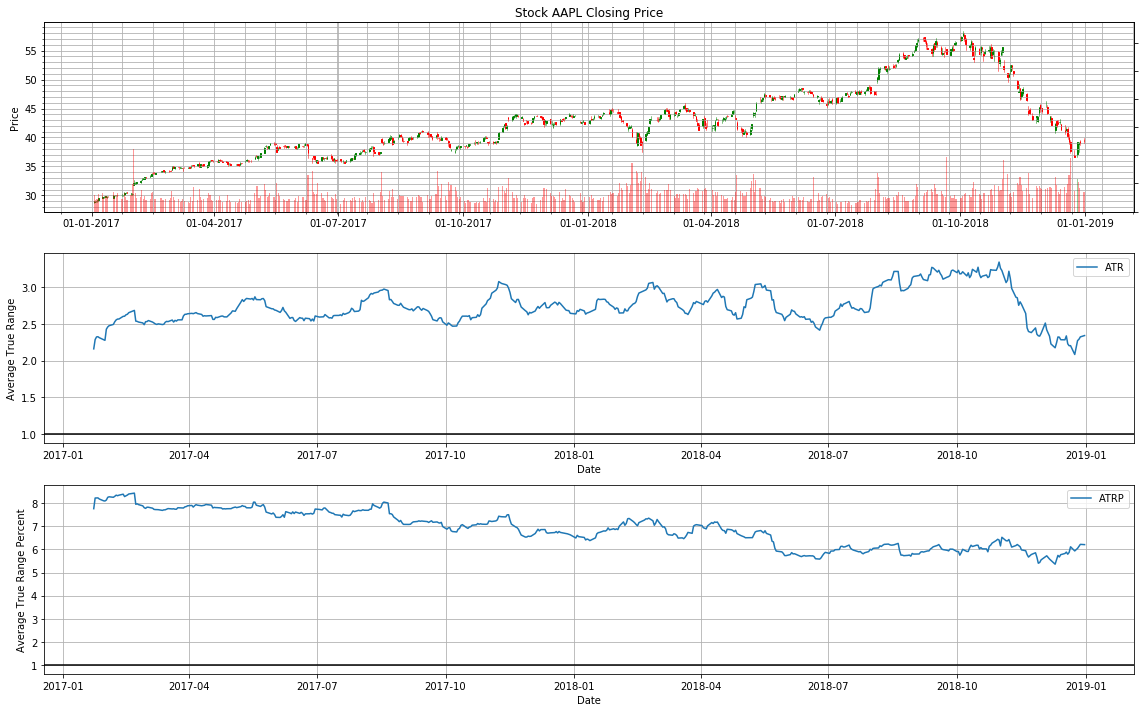

In [8]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(3, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['ATR'], label='ATR')
ax2.axhline(y=1, color='black')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Average True Range')
ax2.set_xlabel('Date')

ax3 = plt.subplot(3, 1, 3)
ax3.plot(df['ATRP'], label='ATRP')
ax3.axhline(y=1, color='black')
ax3.grid()
ax3.legend(loc='best')
ax3.set_ylabel('Average True Range Percent')
ax3.set_xlabel('Date')
plt.tight_layout()
plt.show()